# K-means on iris data set

importing the libraries and data set

In [1]:
import pandas as pd
import numpy as np

#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_iris
%matplotlib inline

iris= load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

K-means clustering with 3 clusters


In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris.data)
kmeans.cluster_centers_.shape

(3, 4)

evaluating the accuracy with 3 clusters

In [3]:
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask]= mode(iris.target[mask])[0]
accuracy_score(iris.target, labels)

0.8933333333333333

Applyting PCA reduction, won't work in our case as already reduced

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn.decomposition import PCA

pca= PCA(n_components=2)

components = pca.fit_transform(iris.data)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris.data)
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask]= mode(iris.target[mask])[0]
accuracy_score(iris.target, labels)

0.8933333333333333

Applying TNSE to improve the accuracy

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=0, init='random')
iris_proj= tsne.fit_transform(iris.data)
cluster_tsne = kmeans.fit_predict(iris_proj)
label_tsne = np.zeros_like(cluster_tsne)
for i in range(3):
    mask = (cluster_tsne == i)
    label_tsne[mask] = mode(iris.target[mask])[0]
    
accuracy_score(iris.target,label_tsne)


0.9133333333333333

ready


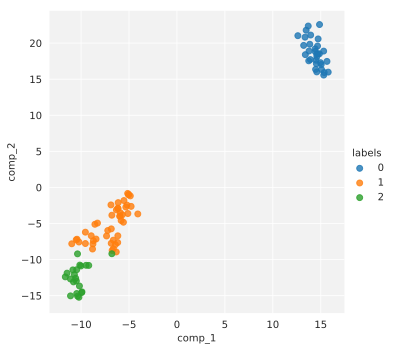

In [6]:


import seaborn as sns
import matplotlib


sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'



matplotlib.rcParams['figure.figsize'] = (4.0, 4.0)
proj = pd.DataFrame(iris_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(100) ,fit_reg=False)
print("ready")


In [7]:
pd.crosstab(iris.target,kmeans.labels_)

col_0,0,1,2
row_0,,,
0,0,50,0
1,49,0,1
2,12,0,38
